### SVM Implementation using Pegasos

## Generate Datasets

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [8]:
X, Y = make_classification(n_classes=2, n_samples=400, n_clusters_per_class=1, random_state=3, n_features=2, n_informative=2, n_redundant=0)

In [27]:
# Convert our Y-labels into {1, -1}
Y[Y==0] = -1

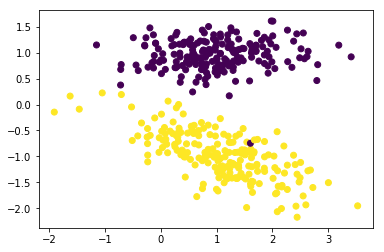

In [9]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [31]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self, W, b, X, Y):
        loss = 0.0
        m = X.shape[0]
        
        loss += 0.5*np.dot(W, W.T)
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C * max(0, (1-ti))
            
        return loss[0][0]
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, maxItr=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Initialize the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        print(self.hingeLoss(W,bias,X,Y))
        
        #Training
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            l = self.hingeLoss(W, bias, X, Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent with random shuffling
            for batch_start in range(0, no_of_samples, batch_size):
                #Assume zero gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini-batch
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                
                #Update W and bias
                W = W - n*W + n*gradw
                bias = bias + n*gradb
        
        self.W = W
        self.b = bias
        return W, bias, losses
                

In [38]:
mySVM = SVM()
W, b, losses = mySVM.fit(X,Y,maxItr=100)
print(losses[0])
print(losses[-1])

400.0
400.0
14.956661431552904


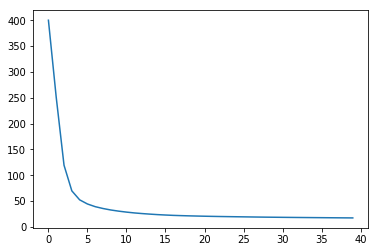

In [35]:
plt.plot(losses)
plt.show()

In [40]:
W,B = mySVM.W, mySVM.b
print(W,B)

[[-0.32338075 -2.03426107]] 0.38600000000000023


In [45]:
def plotHyperplane(w1, w2, b):
    
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1 + b)/w2
    
    plt.figure(figsize=(12,12))
    plt.plot(x_1, x_2)
    
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()

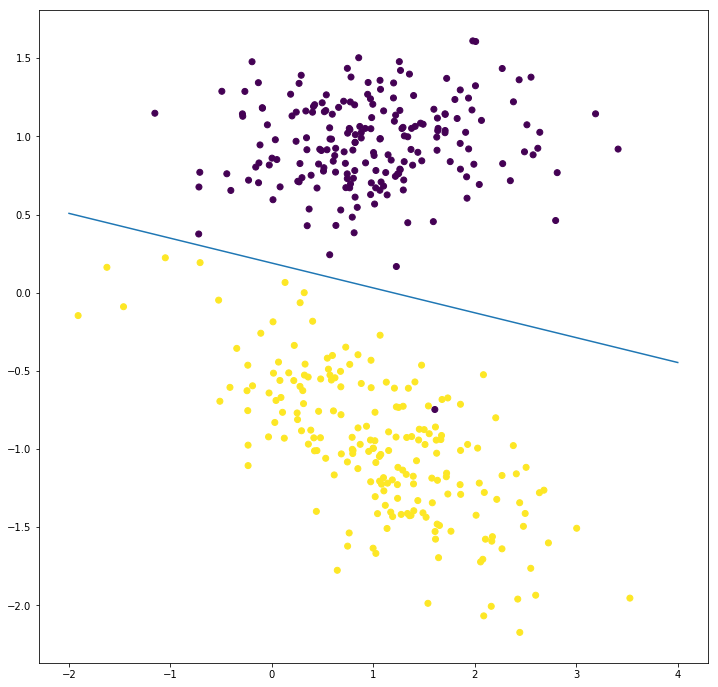

In [46]:
plotHyperplane(W[0,0], W[0,1], B)